In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns





#Tells pandas to show all columns when displaying the DataFrame
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Storytelling Project

## This project was done to reinforce skills in Python, Pandas, Matplotlib, and Numpy.

Using the Pandas library to sharpen the following skills:
    
   - Pandas dataframes and series fundamentals
    
   - Using masks and indexing in Pandas to retrieve subsets of data
    
   - dropping columns
   
   - manipulating data in the following methods
       
      - `pd.sort_values("col_name")`
      
      - `pd["col_name"]` subsetting column
     
      - `pd[["col_A", "col_B"]]` subsetting multiple columns
      
      - `pd[pd["col_name"] > condition]` you can use the following types conditions `<`, `>`, `==`, `!=`, `<=`, `>=`
      
   - Filerting can be done this way:
       - `pd[(pd["col_name"] > condition) & (pd["col_name"] > condition)]` the condition separating this statement can be the following two and == `&`, or == `|`
   - Subsetting rows with by categorical values often involves using `&` or `|` so lets see another way we can solve this:
```
    states = ['Texas', 'California', 'New York']
    certain_states = df['state'].isin(states)
    df[certain_states]


### The project goals are to narrow down the list of colleges to the top 5 or 10 that meets the guidelines set by Codeup instructors. 
    - Student body size not to exceed 10,000
    - Only select colleges within the region specified: Pacific Coast, Southwest, Northeastern states above VA
    - Urban only colleges
    - no reliqgous schools
    - no for profit schools
    - diversity in the school is important


In [2]:
df = pd.read_csv('final_selected_colleges.csv', index_col=[0])

In [3]:
df

,unitid,chronname,city,state,level,control,student_count,med_sat_value,aid_value,cohort_size,CONTROL,region,LOCALE,UGDS,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_AIAN,UGDS_ASIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,out_of_state_tuition,applicants_admitted,4_year_graduation_rate,total
0,110486,CSU Bakersfield,Bakersfield,California,4-year,Public,7350,901.0,11089.0,859.0,1,8,11.0,7226.0,0.1960,0.0656,0.4979,0.0073,0.0650,0.0017,0.0309,0.0255,0.1102,19296,79,41,0.6285
1,110574,CSU East Bay,Hayward,California,4-year,Public,12146,910.0,9038.0,1032.0,1,8,12.0,12079.0,0.1843,0.1083,0.2546,0.0016,0.2439,0.0111,0.0572,0.0659,0.0732,6984,76,43,0.6068
2,162283,Coppin State University,Baltimore,Maryland,4-year,Public,2920,880.0,6077.0,555.0,1,2,11.0,2880.0,0.0139,0.8337,0.0170,0.0003,0.0035,0.0010,0.0205,0.0736,0.0365,13113,70,15,0.8542
3,163453,Morgan State University,Baltimore,Maryland,4-year,Public,6252,893.0,7073.0,1286.0,1,2,11.0,6197.0,0.0203,0.8451,0.0292,0.0032,0.0139,0.0011,0.0342,0.0424,0.0105,18480,68,28,0.8882
4,185129,NJ City University,Jersey City,New Jersey,4-year,Public,6437,916.0,7258.0,649.0,1,2,11.0,6373.0,0.2504,0.2084,0.3435,0.0022,0.0854,0.0000,0.0108,0.0071,0.0923,22386,95,39,0.6373
5,186399,Rutgers,Newark,New Jersey,4-year,Public,7217,1059.0,9830.0,978.0,1,2,11.0,6748.0,0.2570,0.1867,0.2447,0.0012,0.2208,0.0049,0.0292,0.0313,0.0243,31608,72,68,0.6522


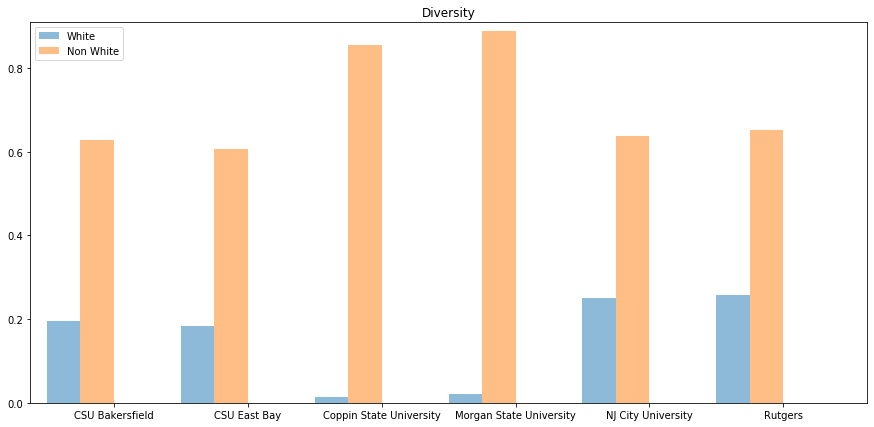

In [4]:
# Here is a visualization on the disstribution white vs non white students

pos = list(range(len(df['UGDS_WHITE'])))
width= 0.25

fig, ax = plt.subplots(figsize=(15, 7))

plt.bar(pos, 
        #using df['pre_score'] data,
        df['UGDS_WHITE'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5,  
        # with label the first value in first_name
        label=df['chronname'][0])

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos], 
        #using df['mid_score'] data,
        df['total'],
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
         
        # with label the second value in first_name
        label=df['chronname'][1])

ax.set_ylabel('')
ax.set_title('Diversity')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(df['chronname'])

plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df['UGDS_WHITE'] + df['total'])] )

# Adding the legend and showing the plot
plt.legend(['White', 'Non White'], loc='upper left')

plt.show()

# A comparison of each colleges graduation rate

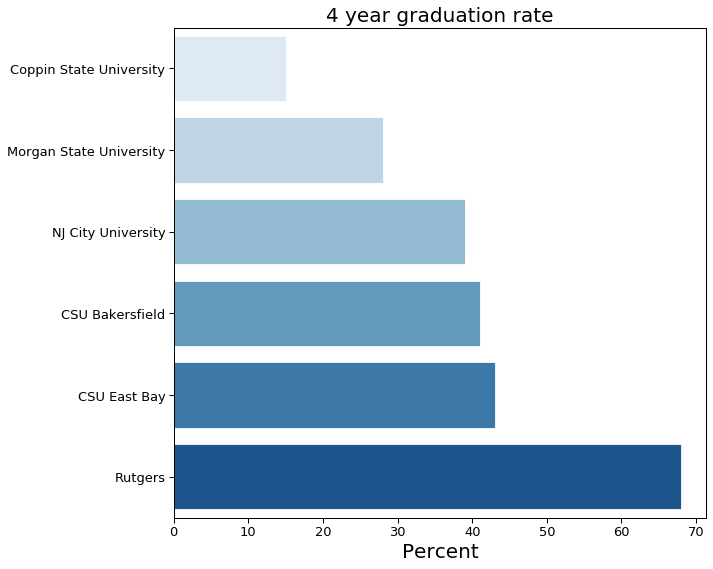

In [5]:
sns.set_context('paper')
plt.figure(figsize=(10, 8))
sns.barplot(x = '4_year_graduation_rate', y = 'chronname', data = df, palette = 'Blues', edgecolor = 'w', order = df.sort_values('4_year_graduation_rate').chronname)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel('Percent', fontsize=20)
plt.ylabel('')
plt.title('4 year graduation rate', fontsize=20)
plt.tight_layout()
# plt.savefig('completion_rate')

plt.show()

# out of state tuition

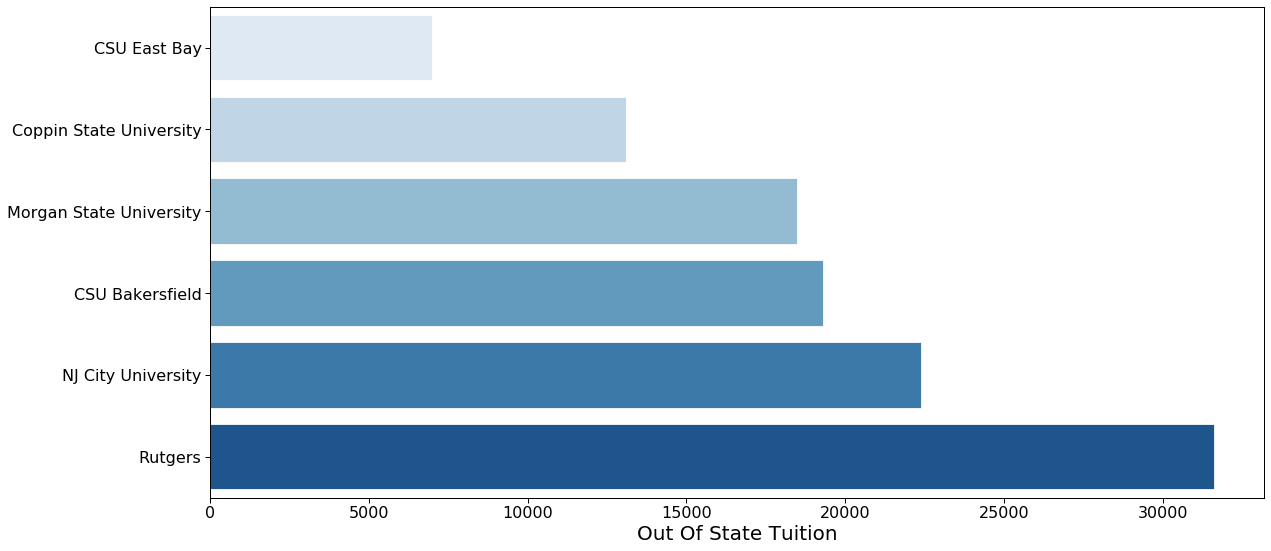

In [6]:
plt.figure(figsize=(18, 8))
plt.rcParams['font.size'] = 18
sns.barplot(data=df, y='chronname', x='out_of_state_tuition', palette = 'Blues', edgecolor = 'w', order = df.sort_values('out_of_state_tuition').chronname)
plt.ylabel("") # to get remove the column_name
plt.xlabel("Out Of State Tuition", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('')

plt.tight_layout()

# plt.savefig('horizontal-chart')
